**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 2

**Datos de la entrega:** Lunes 23 de Octubre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Daniel Araya Sambucci.
- Esteban Leiva Montenegro.




___

# Parte 1  -  Regresión (50 puntos)
___

# Introducción

Considere:
- Se le proporciona un conjunto de datos (diamonds), si desea conocer un poco de los atributos puede consultar en: https://www.kaggle.com/datasets/shivam2503/diamonds
- Note que en la página proporcionada se mencionan más atributos de los que contiene el archivo facilitado.  
- El objetivo de esta parte es ver como el estudiante se enfrenta al proceso de pre-procesamiento, selección de atributos, predicción y evaluación.  Por eso es muy importante que documente en este cuaderno sus decisiones, eso se tomará muy en cuenta en la evaluación de su respuesta.
- El atributo a predecir en regresión se denomina: price.
- Debe comentar ampliamente su código


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from sklearn.preprocessing import StandardScaler


### 1 (5 puntos)
- Cargue el archivo.
- Utilice las herramientas (gráficos, funciones que describen contenido o características de las variables, etc) que considere necesarias para analizar los atributos que tiene el dataset y ver si tiene valores faltantes, valores atípicos, etc.
- Comente sus conclusiones sobre los atritubos.


In [59]:
dataFrame = pd.read_csv('diamonds.csv', header =0, delimiter = ',')
dataFrame.head() #Show first 5 rows


,carat,depth,table,price,x,y,z,cut
0,0.23,61.5,55.0,326,3.95,3.98,2.43,4
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1


1.2 Getting more information about the attributes to know them

In [60]:
dataFrame.describe() #Show a summary of the attributes

,carat,depth,table,price,x,y,z,cut
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,2.904097
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000


#### 1.3.1
Plotting the dataFrame 
    
We decided to create a chart for some attributes in the dataset to understand them better. While it's challenging to draw final conclusions, we can highlight a few interesting observations:

Carat:
Initially, we analyzed the carat attribute versus price to compare price values based on weight. We observed that weight alone doesn't define the price, but there is a clear relationship, as heavier diamonds tend to be more expensive. Interestingly, some diamonds with the same weight are affected differently by price, indicating that price depends on other factors as well.

Depth:
When looking at the diamond's depth, we noticed that most diamonds have a depth of 60. However, a higher depth doesn't necessarily lead to a higher price, as even the diamond with the greatest depth is among the lower-priced ones.

Table:
The majority of diamonds have a table measurement between 60 and 70.

X, Y, Z:
These attributes are intriguing because they each have some outlier values. Notably, the length of the diamond is one of the attributes that show the most significant price variations.




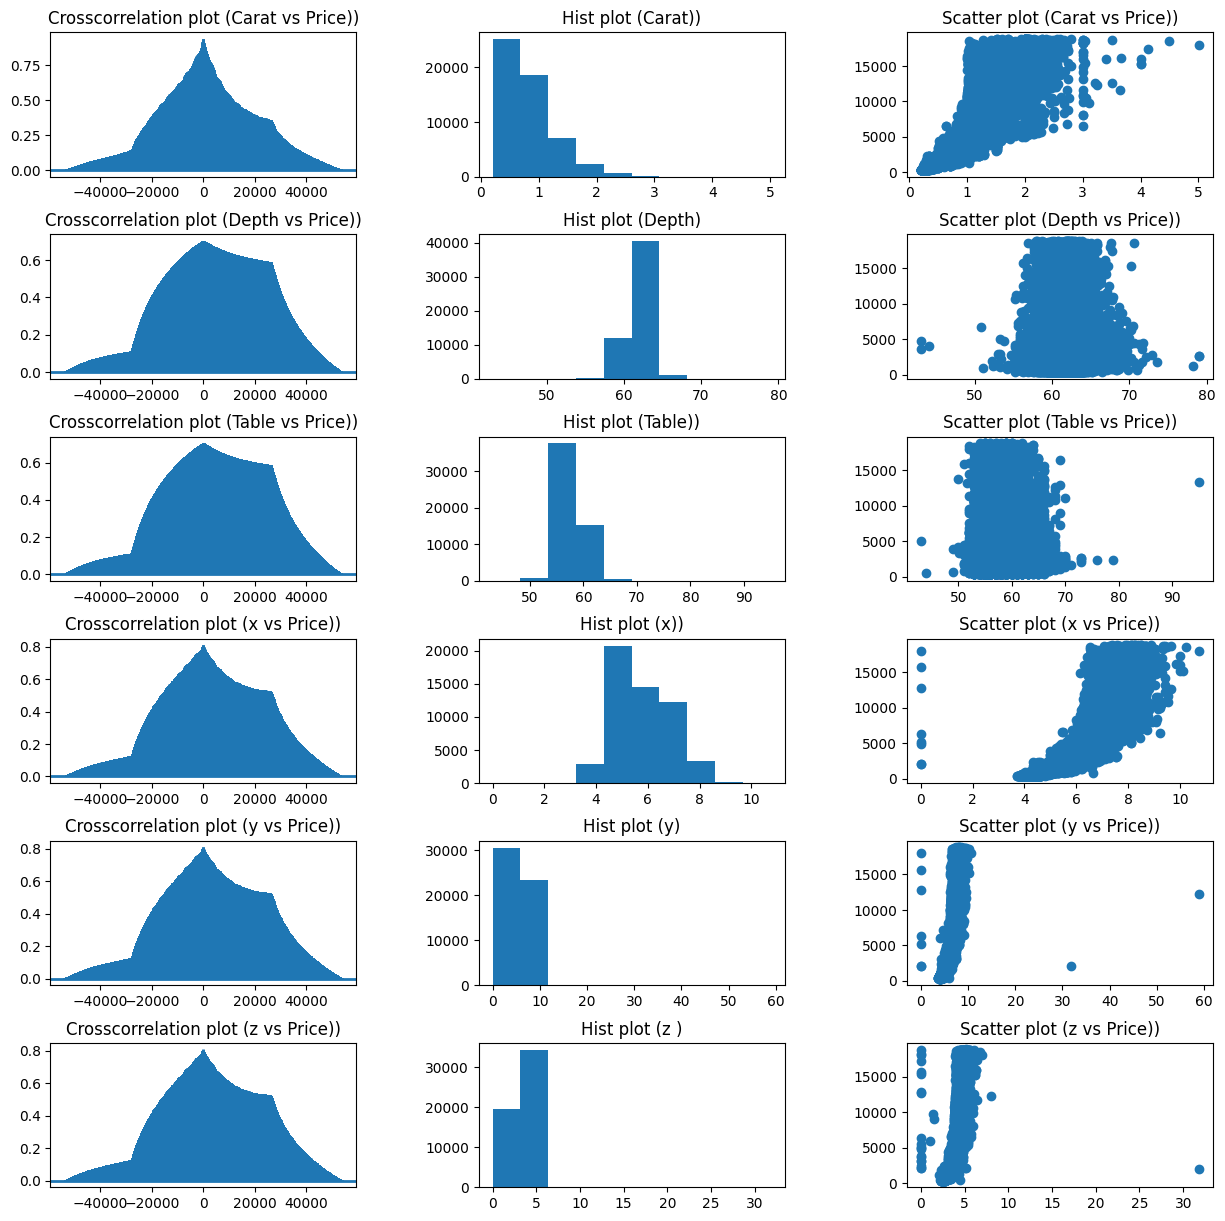

In [69]:
fig, axs  = plt.subplots(6,3, figsize=(15, 15))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
#Carat vs price
axs[0][0].set_title('Crosscorrelation plot (Carat vs Price))')
axs[0][0].xcorr(dataFrame['carat'],dataFrame['price'], maxlags=len(dataFrame['carat']) - 1, usevlines=True,normed=True, lw=2)
axs[0][1].set_title('Hist plot (Carat))')
axs[0][1].hist(dataFrame['carat'])
axs[0][2].set_title('Scatter plot (Carat vs Price))')
axs[0][2].scatter(dataFrame['carat'], dataFrame['price'])
#depth vs price
axs[1][0].set_title('Crosscorrelation plot (Depth vs Price))')
axs[1][0].xcorr(dataFrame['depth'],dataFrame['price'], maxlags=len(dataFrame['depth']) - 1, usevlines=True,normed=True, lw=2)
axs[1][1].set_title('Hist plot (Depth)')
axs[1][1].hist(dataFrame['depth'])
axs[1][2].set_title('Scatter plot (Depth vs Price))')
axs[1][2].scatter(dataFrame['depth'], dataFrame['price'])
#table vs price
axs[2][0].set_title('Crosscorrelation plot (Table vs Price))')
axs[2][0].xcorr(dataFrame['table'],dataFrame['price'], maxlags=len(dataFrame['table']) - 1, usevlines=True,normed=True, lw=2)
axs[2][1].set_title('Hist plot (Table))')
axs[2][1].hist(dataFrame['table'])
axs[2][2].set_title('Scatter plot (Table vs Price))')
axs[2][2].scatter(dataFrame['table'], dataFrame['price'])
axs[3][0].set_title('Crosscorrelation plot (x vs Price))')
axs[3][0].xcorr(dataFrame['x'],dataFrame['price'], maxlags=len(dataFrame['x']) - 1, usevlines=True,normed=True, lw=2)
axs[3][1].set_title('Hist plot (x))')
axs[3][1].hist(dataFrame['x'])
axs[3][2].set_title('Scatter plot (x vs Price))')
axs[3][2].scatter(dataFrame['x'], dataFrame['price'])
axs[4][0].set_title('Crosscorrelation plot (y vs Price))')
axs[4][0].xcorr(dataFrame['y'],dataFrame['price'], maxlags=len(dataFrame['y']) - 1, usevlines=True,normed=True, lw=2)
axs[4][1].set_title('Hist plot (y)')
axs[4][1].hist(dataFrame['y'])
axs[4][2].set_title('Scatter plot (y vs Price))')
axs[4][2].scatter(dataFrame['y'], dataFrame['price'])
axs[5][0].set_title('Crosscorrelation plot (z vs Price))')
axs[5][0].xcorr(dataFrame['z'],dataFrame['price'], maxlags=len(dataFrame['z']) - 1, usevlines=True,normed=True, lw=2)
axs[5][1].set_title('Hist plot (z )')
axs[5][1].hist(dataFrame['z'])
axs[5][2].set_title('Scatter plot (z vs Price))')
axs[5][2].scatter(dataFrame['z'], dataFrame['price'])


plt.show()


# axs[1][1].plot(dataFrame, kind='kde')


#### 1.3.2

Boxplotting the dataFrame

### 2 (5 puntos)
- Se utilizará el modelo Train/Validation (70%)  y Test (30%). 
- Comente su decisión sobre los parámetros shuffle y random_state
- Separe  los  conjuntos de datos (70-30) (X_trainVal, X_test, y_trainVal, y_test )
- Muestre los primeros 5 registros de cada conjunto.


### 3  (10 puntos)
- Preprocese los atributos (Solo deje para más adelante escalar los datos).
- Debe comentar en celdas del texto el por qué seleccionó las técnicas utilizadas.

### 4 (5 puntos)
- Realice selección de atributos.
- Debe utilizar al menos una técnica para justificar su decisión (De entre los métodos: Filter, Wrapper, Embedded).
- Comente sus conclusiones.


### 1.5  (5 puntos)
- Escale los datos.
- Comente qué técnica utilizó y por qué.
- Guarde el archivo ya pre-procesado con el nombre: "'diamondsPROCESADO"

**Nota:** No olvide cómo manejará el "bias" (o agregar columna de unos, o si la implementación de los algoritmos que utilizará permiten indicarle que lo agregue).


### 1.6 (15 puntos)
Presente e implemente un diseño experimental que incluya:
- Dos algoritmos diferentes:
    - Uno será la regresión lineal de mínimos cuadrados sin regularización (OLSR).
    - Usted eligirá un método más, que no sea de los vistos en clase. Si tiene dudas de si puede o no usar algún método, puede consultar al profesor. Para el segundo método deberá elegir al menos un hiperparámetro.
    - Como el OLSR no tiene hiperparámetros, use todo el train/validation para entrenar. Para el otro método, debe usar ten-cross-validation para seleccionar al menos un hiperparámetro.
    - Debe registrar las métricas RMSE y R2. Usted decide cuál de estas dos métricas usa para selecionar la mejor configuración (Justifique su selección).
    
**Nota:** Para el algoritmos seleccionados (no el OLSR) explique los parámetros que recibe según la biblioteca utilizada. 
    

### 1.7 (5 puntos)

- Por medio de una tabla u otro método idóneo que Usted determine, resuma todos los resultados obtenidos (o la mayoría).
- Grafique comparativamente los valores del real versus el predicho (test), de cada uno de los métodos utilizados.  
- Qué conclusiones finales saca sobre los métodos usados como predictores.

___

# Parte 2  -  Clasificación (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: **cardio.csv**
1. Algunos detalles del conjunto de datos los puede ver en: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset.  **Pero debe usar el conjunto de datos que se le dan adjuntos a este Trabajo Práctico, no descargar otro**.
1. El atributo a predecir es: **cardio**.
1. Proponga al menos dos algoritmos a utilizar
1. Métricas:
    1. Accuracy
    1. Ustedes propongan una más.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso.
    1. Para cada uno de los algoritmos seleccionados: 
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros (según la biblioteca).
    1. Explicación del diseño experimental por ejecutar. Recuerde que si el algoritmo requiere seleccionar hyperparámetros, hay que dividir en tres conjuntos de datos: Training, Validation, Testing (60%, 20%, 20%). Se le recomienda confirmar con el profesor cuántos y cuáles hyperparámetros validar.
    1. Programación del diseño experimental. 
    1. Tablas de resultados, gráficos y conclusiones de los resultados, recomendando a su contratante cuál algoritmo utilizar, con qué configuración y por qué lo recomienda. 